In [14]:
import sys
sys.path.insert(0, '..')

import chromadb
import torch
import os
import wandb
import random
import numpy as np
import torch
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import joblib
from torch.utils.data import DataLoader

from core.dataset import PSMDataset
from core.trainer import Trainer
from core.model import GalSpecNet, MetaModel, Informer, AstroM3

In [22]:
random_seed = 42
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [23]:
run_id = 'meridk/AstroCLIPResults3/xnybvuhw'
api = wandb.Api()
run = api.run(run_id)
config = run.config
config['use_wandb'] = False

In [24]:
model = Informer(config)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

Informer(
  (enc_embedding): DataEmbedding(
    (value_embedding): TokenEmbedding(
      (tokenConv): Conv1d(9, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False, padding_mode=circular)
    )
    (position_embedding): PositionalEmbedding()
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): Encoder(
    (attn_layers): ModuleList(
      (0-7): 8 x EncoderLayer(
        (attention): AttentionLayer(
          (inner_attention): ProbAttention(
            (dropout): Dropout(p=0.14904317667318695, inplace=False)
          )
          (query_projection): Linear(in_features=128, out_features=128, bias=True)
          (key_projection): Linear(in_features=128, out_features=128, bias=True)
          (value_projection): Linear(in_features=128, out_features=128, bias=True)
          (out_projection): Linear(in_features=128, out_features=128, bias=True)
        )
        (conv1): Conv1d(128, 512, kernel_size=(1,), stride=(1,))
        (conv2): Conv1d(512, 128, kernel_size=(1,),

In [25]:
weights_path = config['weights_path'] + '-' + run.id + '/weights-best.pth'
model.load_state_dict(torch.load(weights_path, weights_only=True))

<All keys matched successfully>

In [26]:
val_dataset = PSMDataset(config, split='val')
val_dataloader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.29s/it]


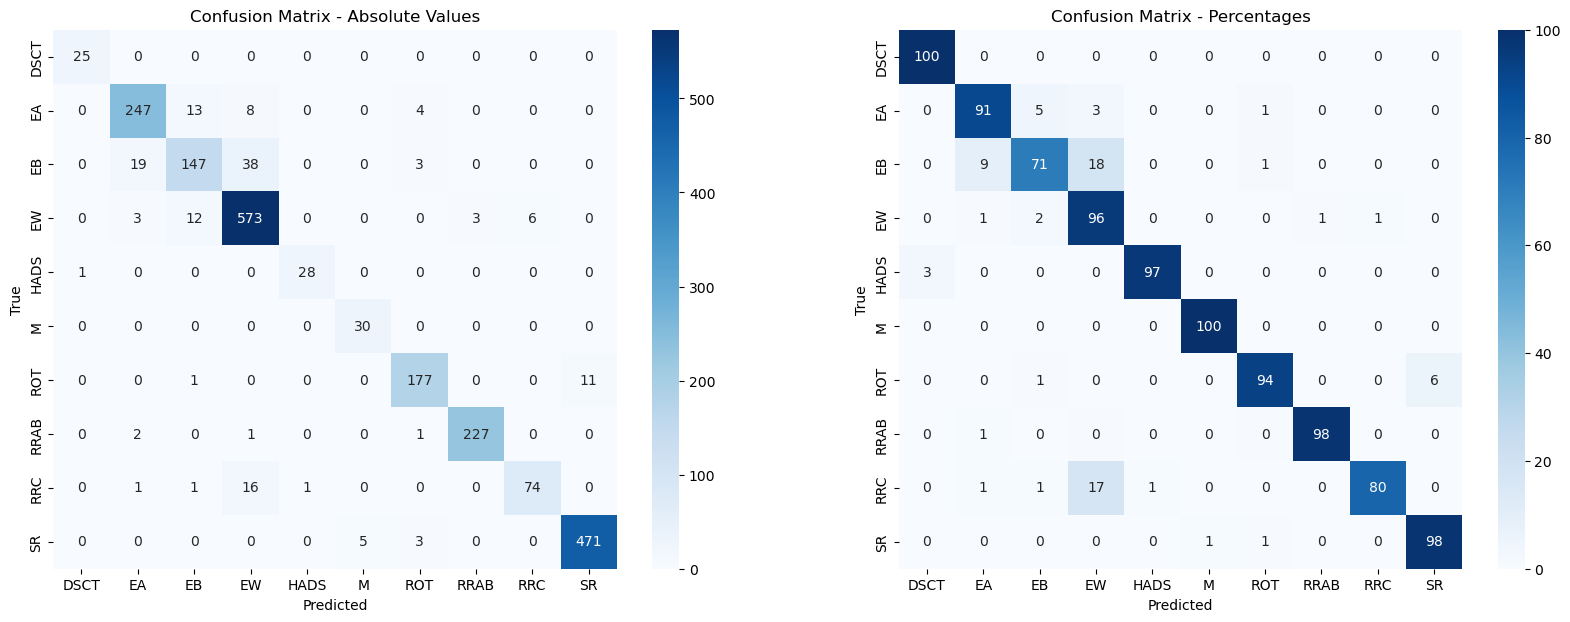

In [27]:
criterion = torch.nn.CrossEntropyLoss()
trainer = Trainer(model=model, optimizer=None, scheduler=None, warmup_scheduler=None,
                  criterion=criterion, device=device, config=config)
conf_matrix = trainer.evaluate(val_dataloader, id2target=val_dataset.id2target)

In [28]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9289033457249071

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.26s/it]


0.9289033457249071


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.26s/it]


0.9284386617100372


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.25s/it]


0.9284386617100372


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.27s/it]


0.9289033457249071


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.25s/it]


0.9289033457249071


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.31s/it]


0.9289033457249071


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.25s/it]


0.9289033457249071


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.26s/it]


0.9289033457249071


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.29s/it]


0.9289033457249071


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:16<00:00,  3.25s/it]


0.9289033457249071


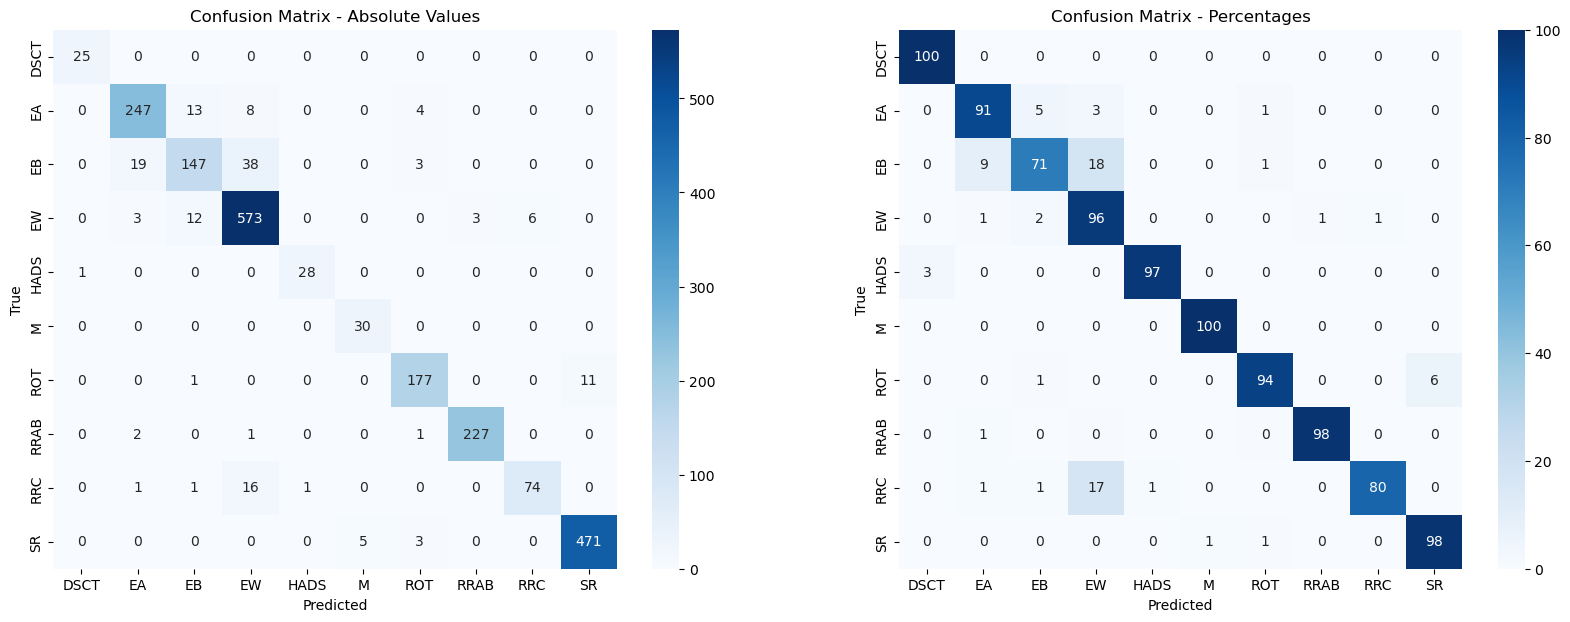

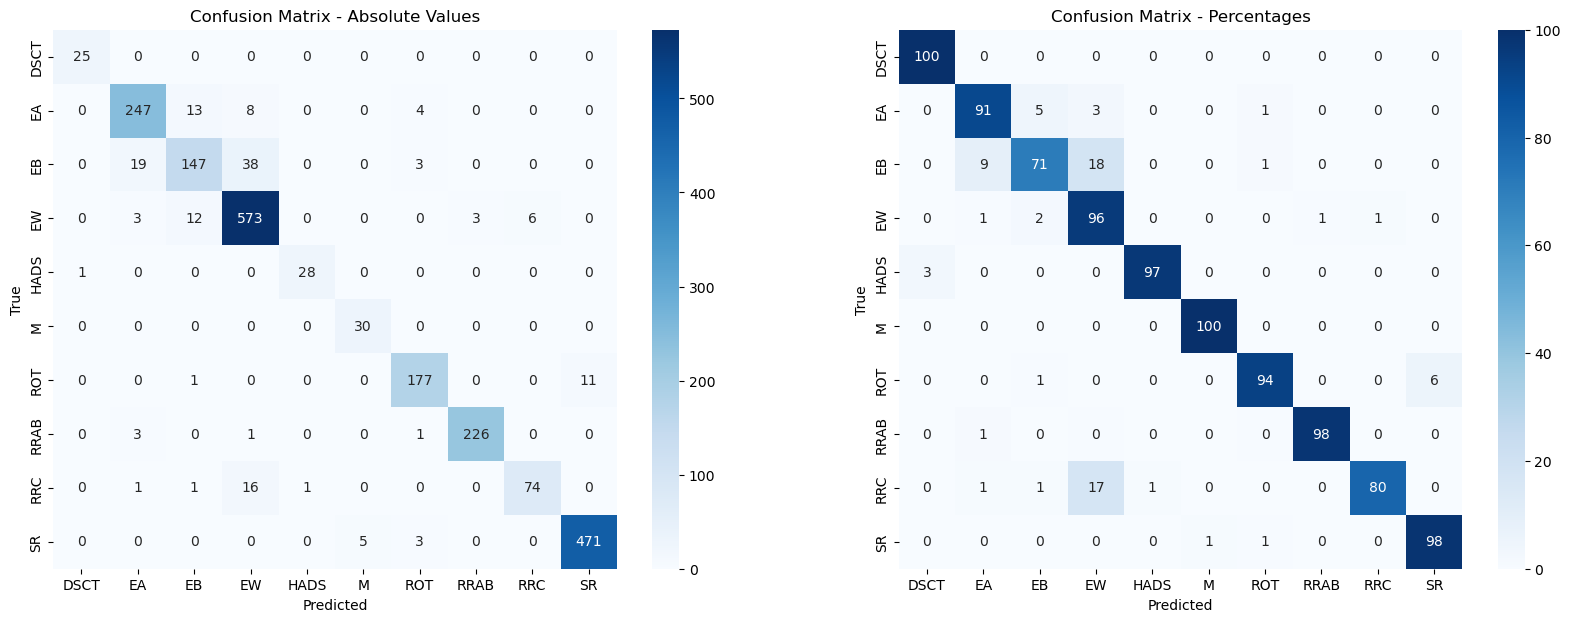

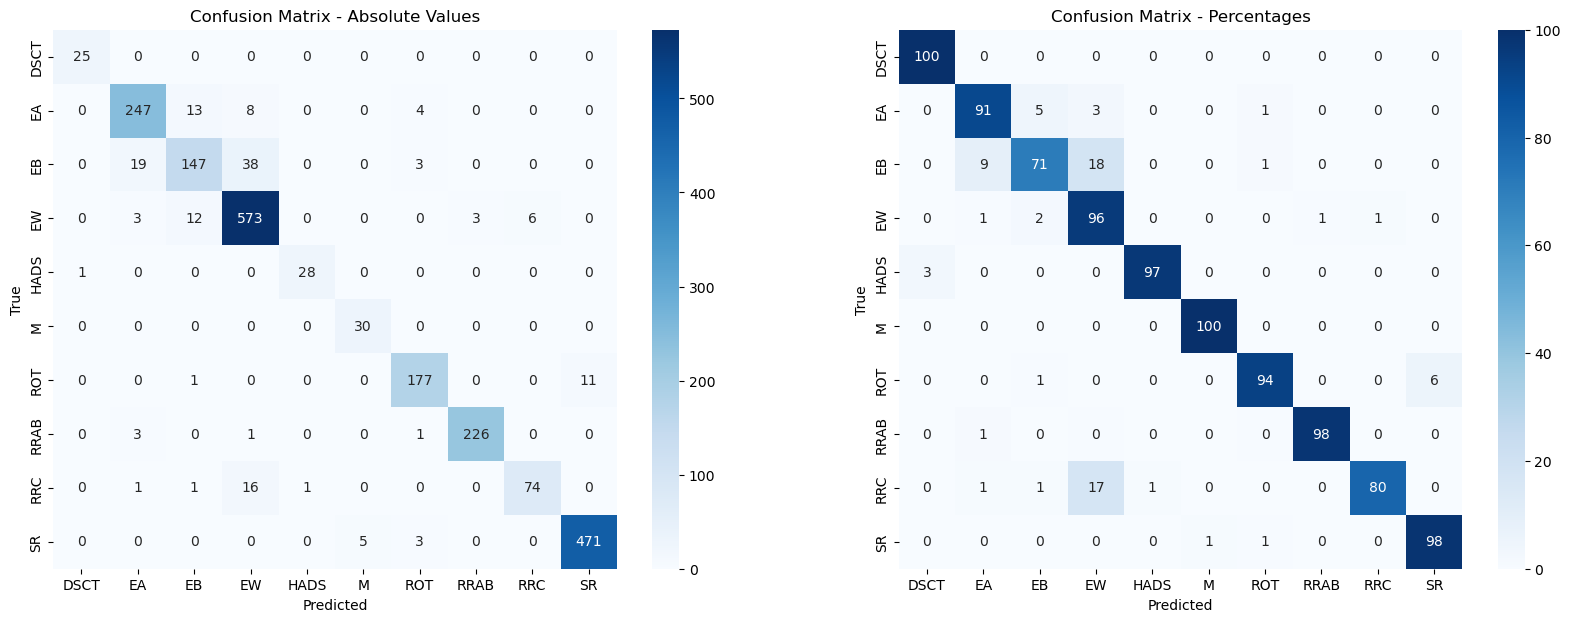

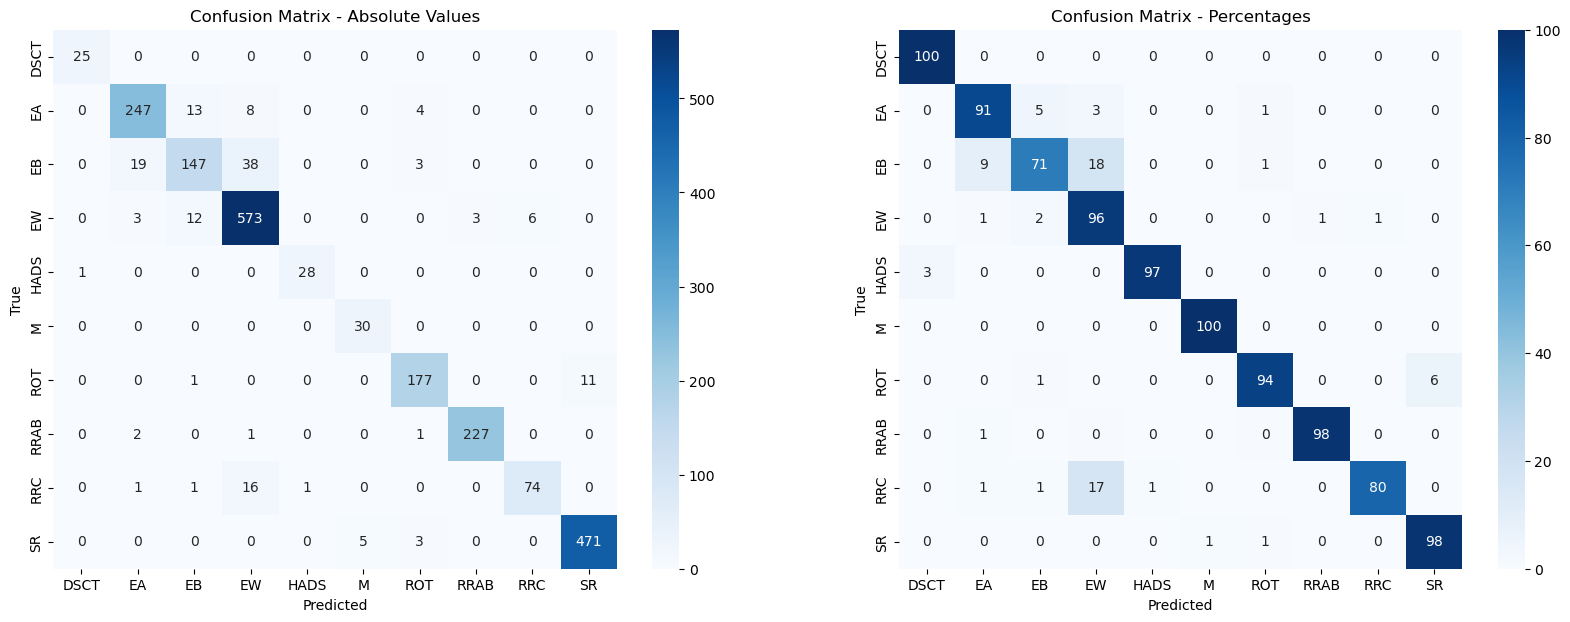

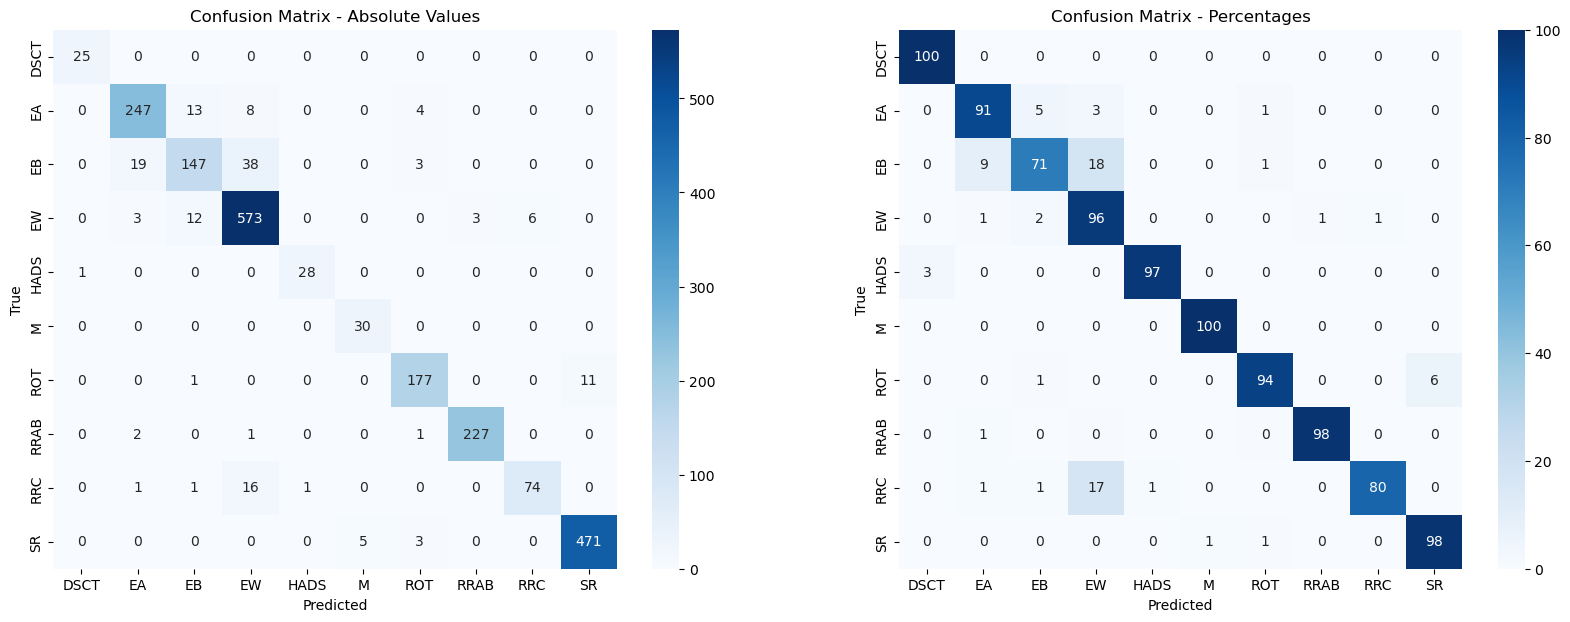

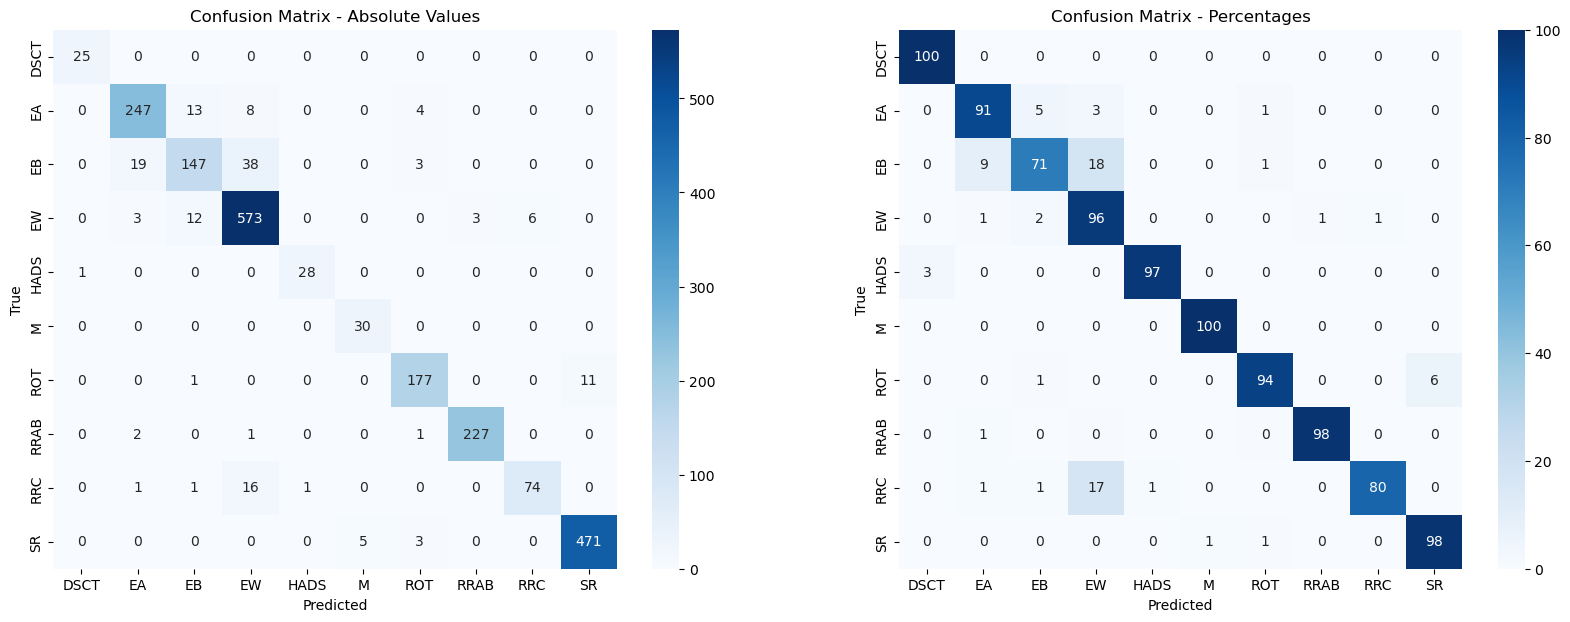

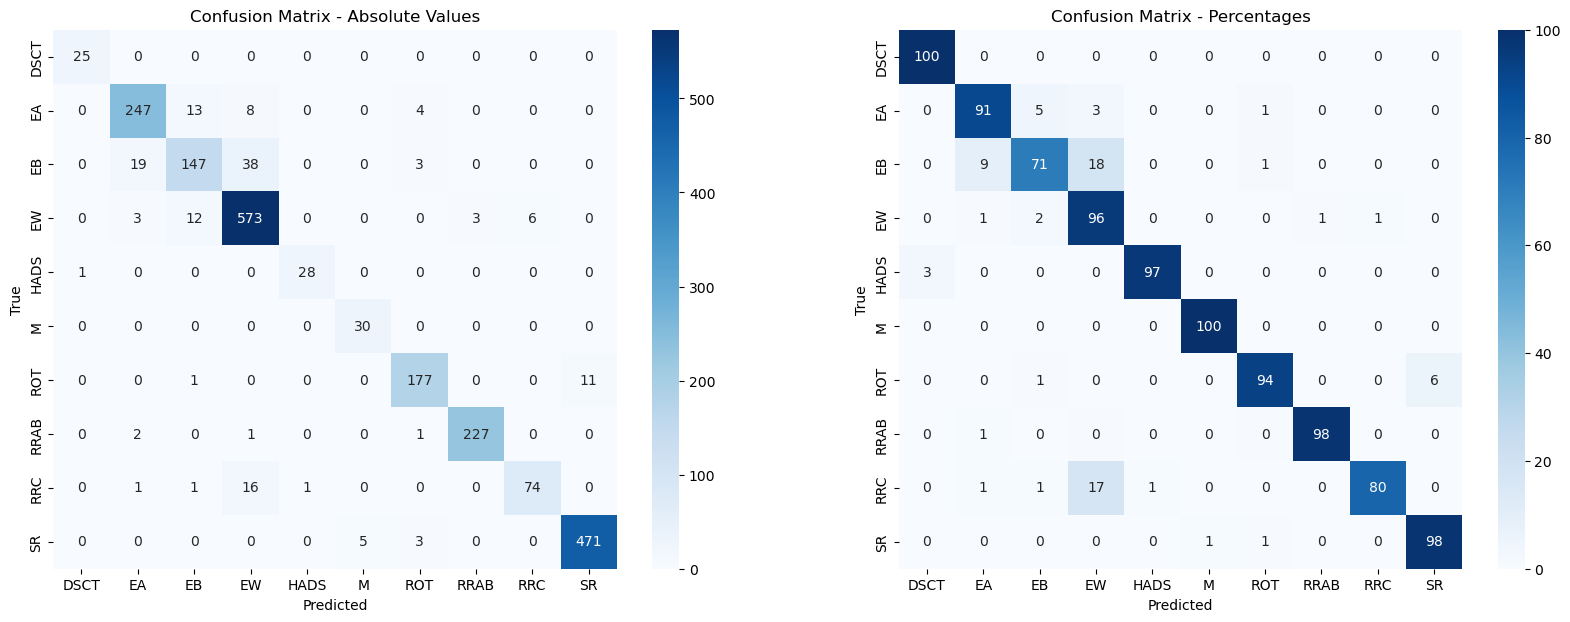

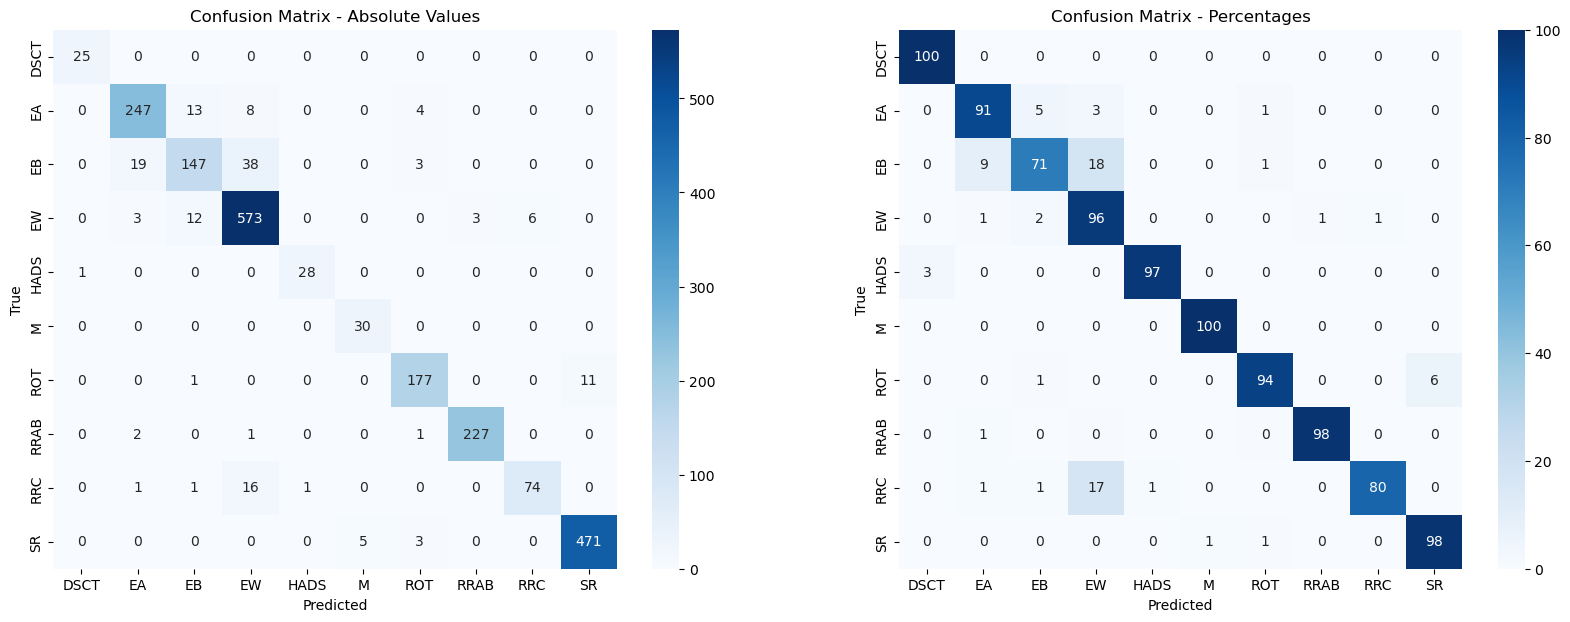

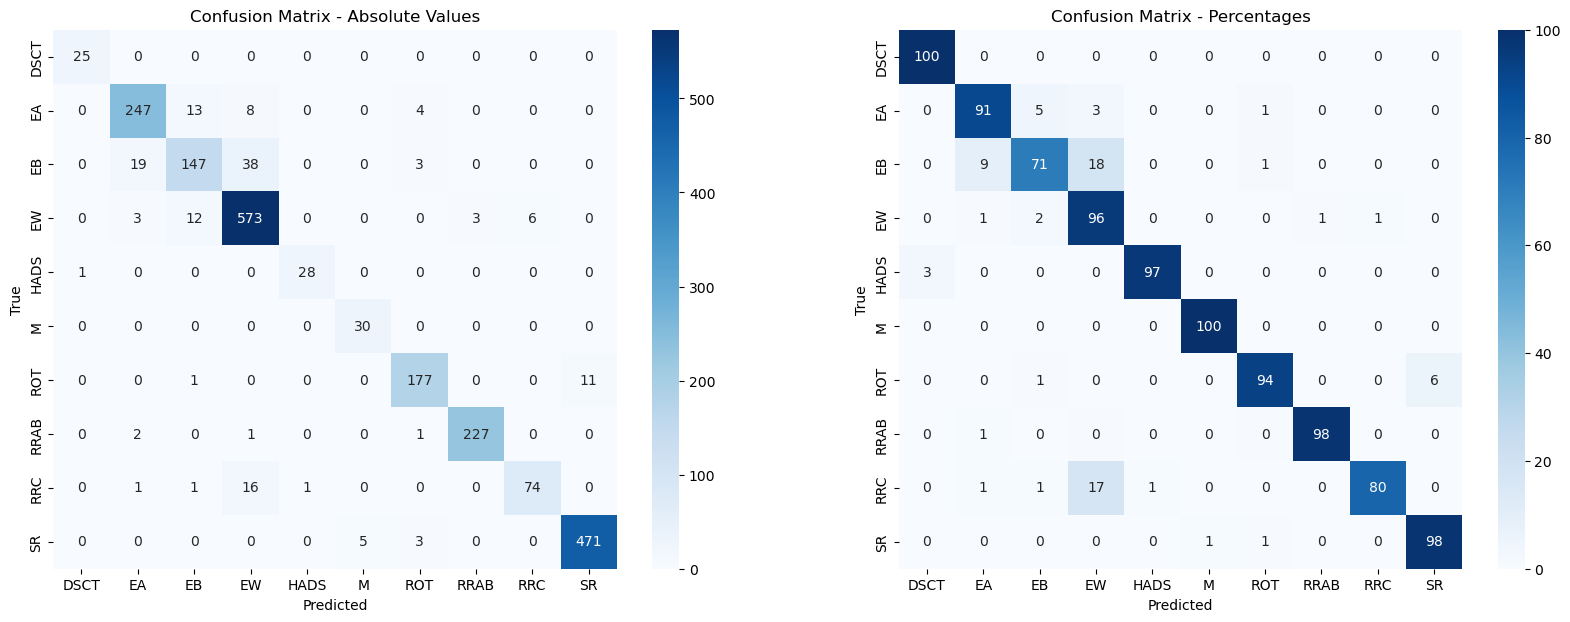

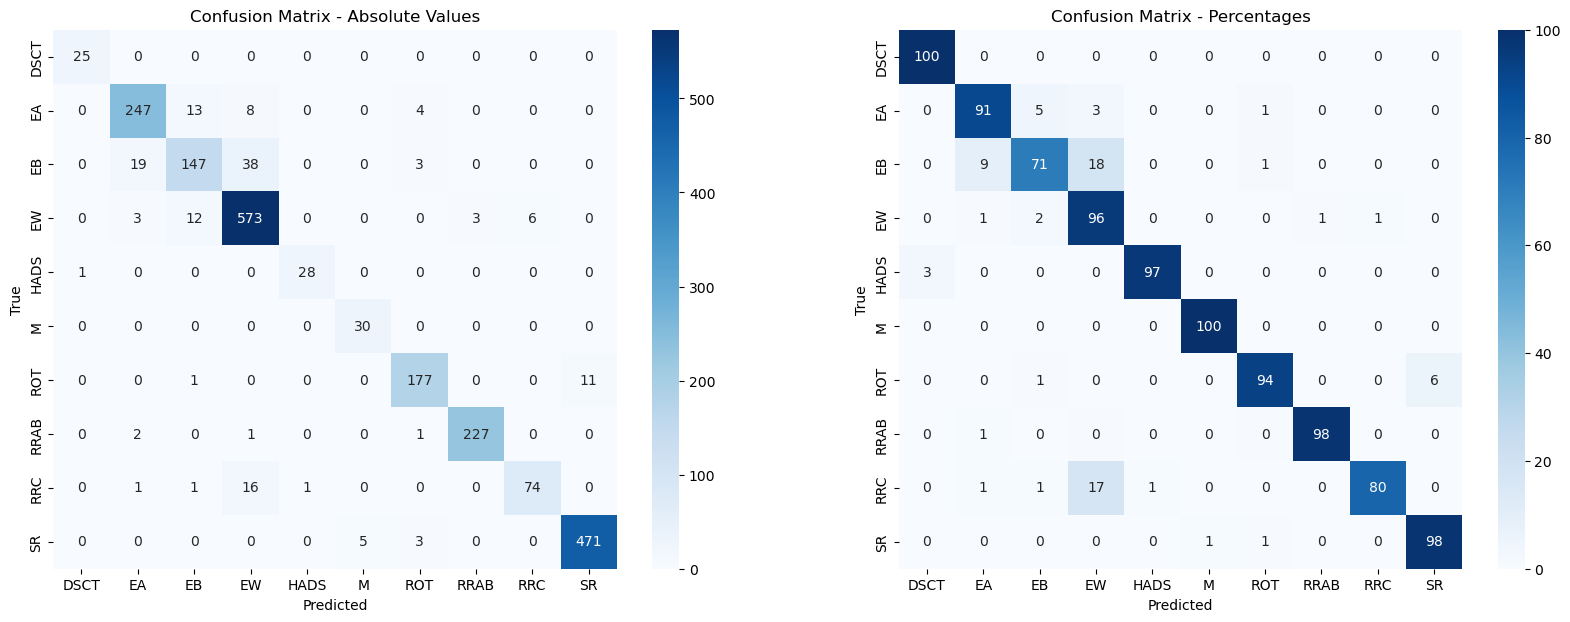

In [35]:
for _ in range(10):
    criterion = torch.nn.CrossEntropyLoss()
    trainer = Trainer(model=model, optimizer=None, scheduler=None, warmup_scheduler=None,
                      criterion=criterion, device=device, config=config)
    conf_matrix = trainer.evaluate(val_dataloader, id2target=val_dataset.id2target)
    print(np.diag(conf_matrix).sum() / conf_matrix.sum())

In [34]:
np.diag(conf_matrix).sum() / conf_matrix.sum()

0.9289033457249071